# Data Discovery - Transactions Data

## Importing Data and Preliminary Cleaning

#### Note: This is only for Harrods Transactions Data, for now

In [4]:
import pandas as pd

### Head and Columns

In [68]:
data = pd.read_csv("data/Harrods January Transactions_LBS.csv")
data.head()

,TRANX_ID,CAL_DAY,ZDATBIRTH,AGE,GENERATION,ZFIRSTSHOP,ZLASTSHOP,ZCUSTOMER,ZTRADE,QUANTITY,...,SPENDBAND_POINTOFTRANX,ZDATBIRTH_RAW,AGE_GROUP,RESIDENCY,TIER_LATEST,CALC_COUNTRY_GP,PRIVATE_SHOPPING_TRANSACTION,PRIVATE_SHOPPING_CUST_FLAG,ZPERSONA,ZISREWTR
0,2025010400000018200000000126,2025-01-04,1900-01-01,125.0,OTHERS,2021-06-06,2025-02-14,9017096,27.0,1.0,...,< £ 5K,19000101,Unknown,UK,Green 0,UK,NaN,NaN,Aspirational,X
1,2025010400000024020000002114,2025-01-04,NaN,NaN,NaN,2017-01-03,2025-01-07,3662245,24.0,1.0,...,£ 5K - £ 10K,0,Unknown,International,Gold,Middle East - GCC,NaN,NaN,VIP,X
2,2025010400000028860000001411,2025-01-04,NaN,NaN,NaN,2017-01-03,2025-01-07,3662245,4.0,1.0,...,£ 5K - £ 10K,0,Unknown,International,Gold,Middle East - GCC,NaN,NaN,VIP,X
3,2025010400000021700000000208,2025-01-04,NaN,NaN,NaN,2009-04-26,2025-01-04,3093317,16.0,1.0,...,< £ 5K,0,Unknown,Dual Resident,Green 0,EU,NaN,NaN,Local Affluent,X
4,2025010400000027640000000204,2025-01-04,1990-05-21,34.0,MILLENNIALS,2009-08-25,2025-01-08,3095197,47.9,2.0,...,£ 5K - £ 10K,19900521,31 - 40,International,Gold,Middle East - GCC,NaN,NaN,VIP,X


- Some customer ages are missing or abnormally high (e.g. 125), which suggests placeholder or incorrect data.
- Many rows have missing values in `ZDATBIRTH`, `AGE`, and `GENERATION`.
- Fields like `GENDER`, `ZPERSONA`, and `RESIDENCY` also have high levels of missingness.
- These columns may need cleaning, filtering, or exclusion depending on their relevance to the analysis.


In [8]:
data.columns

Index(['TRANX_ID', 'CAL_DAY', 'ZDATBIRTH', 'AGE', 'GENERATION', 'ZFIRSTSHOP',
       'ZLASTSHOP', 'ZCUSTOMER', 'ZTRADE', 'QUANTITY', 'CHANNEL',
       'DISTANCE_TO_STORE', 'SITE', 'TYEAR', 'TYEAR_HALF', 'QTR', 'MNTH',
       'TYEAR_MNTH', 'WK', 'MCH3', 'MCH1', 'BRAND', 'PRODUCT_DETAIL',
       'PRODUCT_DESCRIPTION_LONG', 'GENDER', 'SPENDBAND_LATEST',
       'SPENDBAND_POINTOFTRANX', 'ZDATBIRTH_RAW', 'AGE_GROUP', 'RESIDENCY',
       'TIER_LATEST', 'CALC_COUNTRY_GP', 'PRIVATE_SHOPPING_TRANSACTION',
       'PRIVATE_SHOPPING_CUST_FLAG', 'ZPERSONA', 'ZISREWTR'],
      dtype='object')

### Column Descriptions (Preliminary Assumptions)



- `TRANX_ID` — Unique identifier for each transaction
- `CAL_DAY` — Calendar day of transaction
- `ZDATBIRTH` — Customer date of birth
- `AGE` — Customer age at time of transaction
- `GENERATION` — Generation category (e.g. Millennials, Gen X)
- `ZFIRSTSHOP` — Date of customer’s first recorded purchase
- `ZLASTSHOP` — Date of customer’s most recent purchase
- `ZCUSTOMER` — Customer ID
- `ZTRADE` — Internal trade or product classification code
- `QUANTITY` — Number of items in the transaction
- `CHANNEL` — Sales channel (e.g. store location or online)
- `DISTANCE_TO_STORE` — Approximate distance between customer and store
- `SITE` — Specific store or department (e.g. Harrods Shop)
- `TYEAR` — Transaction year
- `TYEAR_HALF` — Half-year marker (e.g. H01.2024 or H02.2024)
- `QTR` — Quarter of the year (e.g. Q1, Q4)
- `MNTH` — Month number
- `TYEAR_MNTH` — Combined year-month identifier (e.g. 202412)
- `WK` — Week number of the year
- `MCH3` — High-level merchandise category (e.g. RESTAURANTS)
- `MCH1` — More detailed product category
- `BRAND` — Brand name of purchased item
- `PRODUCT_DETAIL` — Brief item description
- `PRODUCT_DESCRIPTION_LONG` — Detailed product description
- `GENDER` — Customer gender
- `SPENDBAND_LATEST` — Customer's latest spending tier
- `SPENDBAND_POINTOFTRANX` — Spend band at time of transaction
- `ZDATBIRTH_RAW` — Raw date of birth field (possibly uncleaned)
- `AGE_GROUP` — Customer's age bracket
- `RESIDENCY` — Whether customer is local (UK) or international
- `TIER_LATEST` — Customer loyalty tier (e.g. Gold, Black)
- `CALC_COUNTRY_GP` — Country grouping (e.g. UK, GCC)
- `PRIVATE_SHOPPING_TRANSACTION` — Indicates a private shopping event
- `PRIVATE_SHOPPING_CUST_FLAG` — Marks whether customer is a private shopper
- `ZPERSONA` — Segment or persona assigned to the customer
- `ZISREWTR` — Flag for rewards or loyalty program membership


## Basic Exploration

In [12]:
data.describe()

,AGE,ZCUSTOMER,ZTRADE,QUANTITY,TYEAR,MNTH,TYEAR_MNTH,WK,ZDATBIRTH_RAW
count,128880.000000,2.121070e+05,2.121070e+05,212107.000000,212107.0,212107.0,212107.0,212107.000000,2.121070e+05
mean,42.981137,8.621012e+06,1.808452e+02,1.231286,2024.0,12.0,202412.0,49.572466,1.203783e+07
std,16.738716,3.739320e+06,3.937254e+03,1.773588,0.0,0.0,0.0,1.185347,9.674483e+06
min,0.000000,2.315791e+06,-1.192683e+06,-74.000000,2024.0,12.0,202412.0,48.000000,0.000000e+00
25%,32.000000,5.192512e+06,6.950000e+00,1.000000,2024.0,12.0,202412.0,49.000000,0.000000e+00
50%,41.000000,9.017750e+06,2.028000e+01,1.000000,2024.0,12.0,202412.0,50.000000,1.969063e+07
75%,51.000000,1.201182e+07,6.300000e+01,1.000000,2024.0,12.0,202412.0,50.000000,1.987020e+07
max,125.000000,1.343784e+07,9.072500e+05,324.000000,2024.0,12.0,202412.0,52.000000,2.025021e+07


- `AGE` ranges from 0 to 125, with a median of 41 — values like 0 and 125 suggest possible data issues.
- `ZTRADE` includes extreme outliers (min: -1.19M, max: 907K), which may indicate data entry errors or require winsorization.
- `QUANTITY` has negative values and outliers (min: -74, max: 324), which are likely invalid for transaction quantities.
- `ZDATBIRTH_RAW` has a large cluster at 0, reinforcing that many birthdates are placeholders or missing.
- All time-related fields (`TYEAR`, `MNTH`, `TYEAR_MNTH`, `WK`) are consistent and likely system-generated — no issues found.


In [14]:
def summarize_df(df):
    hidden_nulls = ["Unknown", "None", "0", "1900-01-01", "", " ", "NaT", "nan", "NaN"]
    
    hidden_null_counts = {}
    for col in df.columns:
        col_data = df[col].astype(str).str.strip()
        mask_not_null = ~df[col].isnull()
        hidden_mask = mask_not_null & col_data.isin(hidden_nulls)
        hidden_null_counts[col] = hidden_mask.sum()


    summary = pd.DataFrame({
        'non_null_count': df.count(),
        'null_count': df.isnull().sum(),
        'hidden_null_count': pd.Series(hidden_null_counts),
        'unique_count': df.nunique(),
        'dtype': df.dtypes,
        'most_common': df.mode().iloc[0]
    })

    return summary

summarize_df(data)

,non_null_count,null_count,hidden_null_count,unique_count,dtype,most_common
TRANX_ID,212107,0,0,96404,object,2025010400000087460000000131
CAL_DAY,212107,0,0,20,object,2025-01-12
ZDATBIRTH,128880,83227,937,12891,object,1900-01-01
AGE,128880,83227,0,90,float64,37.0
GENERATION,128862,83245,0,5,object,MILLENNIALS
ZFIRSTSHOP,212107,0,0,5946,object,2025-01-03
ZLASTSHOP,212107,0,0,57,object,2025-02-25
ZCUSTOMER,212107,0,0,42272,int64,4335723
ZTRADE,212107,0,0,9667,float64,0.0
QUANTITY,212107,0,0,751,float64,1.0


### Data Quality Observations (Based on Field Purpose)

- `ZDATBIRTH` has 83k true nulls (39%) and 937 placeholders like "1900-01-01", making date-of-birth data largely unreliable.
- `AGE` is missing in the same rows as `ZDATBIRTH`, and `AGE_GROUP` has ~85k (40%) rows marked as "Unknown".
- `ZDATBIRTH_RAW` has 83k entries set to 0, confirming poor reliability of raw birthdate values.
- `GENERATION` is derived from age and also missing for over 83k rows, limiting demographic segmentation.
- `RESIDENCY` and `CALC_COUNTRY_GP` have ~43k nulls each (20%) which affects geographic profiling.
- `PRODUCT_DESCRIPTION_LONG` is missing in ~89% of rows; likely unusable for product-level analysis or NLP.
- `PRIVATE_SHOPPING_TRANSACTION` and `PRIVATE_SHOPPING_CUST_FLAG` are empty for over 95% of records — useful only for specific segmentation, if needed.
- Fields like `CHANNEL`, `SITE`, `TYEAR`, `QTR`, `MNTH`, and `TYEAR_MNTH` are complete and consistent — ideal for time-based and location-based analysis.
- `BRAND` is missing in 816 rows, which is minimal given the dataset size (~0.4%).


# Data Discovery - Grouped Transactions Data (Recieved 28 April)

In [3]:
import os
import pandas as pd
grouped_transactions_raw = pd.read_csv("data/RAW_LBS_TEAM1_20250428.csv")
display(grouped_transactions_raw.columns)
print("Earliest Date:", grouped_transactions_raw.CAL_DAY.min(), ". Latest Date:", grouped_transactions_raw.CAL_DAY.max())
print("Number of Rows:", len(grouped_transactions_raw))
file_size_mb = os.path.getsize("data/RAW_LBS_TEAM1_20250428.csv") / (1024 * 1024)
print("CSV File Size in MB:", round(file_size_mb,2))


Index(['TRANX_TTL', 'QUANTITY_TTL', 'TRADE_TTL', 'CAL_DAY', 'CHANNEL', 'SITE',
       'TYEAR', 'TYEAR_HALF', 'QTR', 'MNTH', 'TYEAR_MNTH', 'WK', 'MCH3',
       'GENDER', 'SPENDBAND_LATEST', 'SPENDBAND_POINTOFTRANX', 'AGE_GROUP',
       'RESIDENCY', 'TIER_LATEST', 'CALC_COUNTRY_GP',
       'PRIVATE_SHOPPING_TRANSACTION', 'PRIVATE_SHOPPING_CUST_FLAG',
       'ZPERSONA', 'ZISREWTR'],
      dtype='object')

Earliest Date: 2022-01-30 . Latest Date: 2025-04-27
Number of Rows: 10042664
CSV File Size in MB: 1757.62


# Data Discovery - Flights Data

## Forecasted passenger departures

In [101]:
import os
flights_raw_1 = pd.read_csv("data/Departing passengers by airport 12M forecast based on tickets Custom view 2.csv")
display(flights_raw_1.columns)
print("Earliest Date:", flights_raw_1.FLIGHT_LEG_DEPARTURE_DATE.min(), ". Latest Date:", flights_raw_1.FLIGHT_LEG_DEPARTURE_DATE.max())
print("Number of Rows:", len(flights_raw_1))
file_size_mb = os.path.getsize("data/Departing passengers by airport 12M forecast based on tickets Custom view 2.csv") / (1024 * 1024)
print("CSV File Size in MB:", round(file_size_mb,2))


Index(['FLIGHT_LEG_INTERNATIONAL', 'FLIGHT_LEG_ORIGIN_AIRPORT',
       'FLIGHT_LEG_ORIGIN_CITY', 'FLIGHT_LEG_ORIGIN_REGION',
       'FLIGHT_LEG_ORIGIN_COUNTRY', 'FLIGHT_LEG_DESTINATION_AIRPORT',
       'FLIGHT_LEG_DESTINATION_CITY', 'FLIGHT_LEG_DESTINATION_REGION',
       'FLIGHT_LEG_DESTINATION_COUNTRY', 'FLIGHT_LEG_DEPARTURE_DATE',
       'EXTRACTION_DATE', 'PAX_NATIONALITY', 'PAX', 'CONFIDENCE_INDEX'],
      dtype='object')

Earliest Date: 2025-05-01 . Latest Date: 2026-03-01
Number of Rows: 26417
CSV File Size in MB: 1.7120323181152344


- **Forecasted passenger departures** (May 2025 – Mar 2026), ~26k rows, ~1.7MB file.
- Includes flight origin/destination, nationality, pax count, and confidence index.
- Useful for **travel demand forecasting**

## Historical air visitor arrivals

In [5]:
import os
flight_raw_2 = pd.read_csv("data/Air visitors Global history edition based on tickets Custom view 4.csv")
display(flight_raw_2.columns)
print("Earliest Date:", flight_raw_2.FLIGHT_LEG_ARRIVAL_DATE.min(), ". Latest Date:", flight_raw_2.FLIGHT_LEG_ARRIVAL_DATE.max())
print("Number of Rows:", len(flight_raw_2))
file_size_mb = os.path.getsize("data/Air visitors Global history edition based on tickets Custom view 4.csv") / (1024 * 1024)
print("CSV File Size in MB:", file_size_mb)

Index(['FLIGHT_TICKET_ISSUE_DATE', 'FLIGHT_LEG_INTERNATIONAL',
       'FLIGHT_LEG_ORIGIN_AIRPORT', 'FLIGHT_LEG_ORIGIN_CITY',
       'FLIGHT_LEG_ORIGIN_REGION', 'FLIGHT_LEG_ORIGIN_COUNTRY',
       'FLIGHT_LEG_DESTINATION_AIRPORT', 'FLIGHT_LEG_DESTINATION_CITY',
       'FLIGHT_LEG_DESTINATION_REGION', 'FLIGHT_LEG_DESTINATION_COUNTRY',
       'FLIGHT_LEG_ARRIVAL_DATE', 'EXTRACTION_DATE', 'LOS_AT_DESTINATION_CAT',
       'LOS_AT_DESTINATION_NIGHTS', 'TRIP_INTERNATIONAL',
       'TRIP_ORIGIN_AIRPORT', 'TRIP_ORIGIN_CITY', 'TRIP_ORIGIN_REGION',
       'TRIP_ORIGIN_COUNTRY', 'PAX_PROFILE', 'PAX_NATIONALITY',
       'PAX_GROUP_SIZE', 'PAX'],
      dtype='object')

Earliest Date: 2025-01-01 . Latest Date: 2025-01-31
Number of Rows: 4223871
CSV File Size in MB: 462.9479646682739


- **Historical air visitor arrivals** (Jan 2025 only), ~4.2M rows, ~463MB file.
- Covers flight and trip details: origins, destinations, group size, LOS, nationality.

### Evaluating Grouping Compression

In [21]:
import pandas as pd

# Assume df is your original DataFrame

# Columns to group by
group_cols = [
    'FLIGHT_TICKET_ISSUE_DATE',
    'LOS_AT_DESTINATION_CAT',
    'LOS_AT_DESTINATION_NIGHTS',
    'TRIP_INTERNATIONAL',
    'TRIP_ORIGIN_CITY',
    'TRIP_ORIGIN_REGION',
    'TRIP_ORIGIN_COUNTRY',
    'PAX_PROFILE',
    'PAX_NATIONALITY',
    'PAX_GROUP_SIZE',
    'FLIGHT_LEG_ARRIVAL_DATE',
    'FLIGHT_LEG_DESTINATION_CITY'
]

df = flight_raw_2

# Original number of rows
original_rows = len(df)

# Grouping and summing
df_grouped = df.groupby(group_cols, as_index=False)['PAX'].sum()

# New number of rows
new_rows = len(df_grouped)

# Reduction calculation
reduction_percentage = 100 * (original_rows - new_rows) / original_rows

# Print results
print(f"Original rows: {original_rows}")
print(f"New rows after grouping: {new_rows}")
print(f"Reduction in rows: {reduction_percentage:.2f}%")

# Quick summary: first 10 rows
print("\nSample of grouped data (first 10 rows):")
display(df_grouped.head(10))

# Optional: Distribution of PAX after grouping
print("\nDistribution of summed PAX:")
print(df_grouped['PAX'].describe())


Original rows: 4223871
New rows after grouping: 440639
Reduction in rows: 89.57%

Sample of grouped data (first 10 rows):


,FLIGHT_TICKET_ISSUE_DATE,LOS_AT_DESTINATION_CAT,LOS_AT_DESTINATION_NIGHTS,TRIP_INTERNATIONAL,TRIP_ORIGIN_CITY,TRIP_ORIGIN_REGION,TRIP_ORIGIN_COUNTRY,PAX_PROFILE,PAX_NATIONALITY,PAX_GROUP_SIZE,FLIGHT_LEG_ARRIVAL_DATE,FLIGHT_LEG_DESTINATION_CITY,PAX
0,2023-12-23,STAY,3.0,True,STR,DEBAD,DE,LEISURE,DE,1.0,2025-01-28,LON,1
1,2023-12-24,STAY,2.0,True,BCN,ESCAT,ES,LEISURE,ES,3.0,2025-01-06,LON,3
2,2023-12-29,END_OF_TRIP,-1.0,True,CGN,DENOR,DE,LEISURE,DE,1.0,2025-01-13,LON,1
3,2023-12-31,END_OF_TRIP,-1.0,True,NYC,US_NY,US,BUSINESS,US,2.0,2025-01-01,LON,2
4,2024-01-02,END_OF_TRIP,-1.0,True,FRA,DEHES,DE,LEISURE,DE,1.0,2025-01-02,LON,2
5,2024-01-02,END_OF_TRIP,-1.0,True,FRA,DEHES,DE,LEISURE,DE,2.0,2025-01-02,LON,2
6,2024-01-02,END_OF_TRIP,-1.0,True,MIL,ITLOM,IT,LEISURE,IT,4.0,2025-01-02,LON,4
7,2024-01-04,END_OF_TRIP,-1.0,True,PAR,FRILE,FR,LEISURE,FR,1.0,2025-01-04,LON,1
8,2024-01-05,END_OF_TRIP,-1.0,True,FRA,DEHES,DE,BUSINESS,DE,2.0,2025-01-05,LON,1
9,2024-01-05,END_OF_TRIP,-1.0,True,FRA,DEHES,DE,GROUP,DE,7.0,2025-01-05,LON,14



Distribution of summed PAX:
count    440639.000000
mean          1.440081
std           1.822937
min         -68.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         102.000000
Name: PAX, dtype: float64


## Future bookings air visitor data

In [116]:
flight_raw_3 = pd.read_csv("data/Air visitors Future bookings edition based on tickets _ LBS.csv")
display(flight_raw_3.columns)
print("Earliest Date:", flight_raw_3.FLIGHT_LEG_ARRIVAL_DATE.min(), ". Latest Date:", flight_raw_3.FLIGHT_LEG_ARRIVAL_DATE.max())
print("Number of Rows:", len(flight_raw_3))
print("Extraction Date Range:", flight_raw_3.EXTRACTION_DATE.min(), "to", flight_raw_3.EXTRACTION_DATE.max())
file_size_mb = os.path.getsize("data/Air visitors Future bookings edition based on tickets _ LBS.csv") / (1024 * 1024)
print("CSV File Size in MB:", file_size_mb)

Index(['FLIGHT_TICKET_ISSUE_DATE', 'FLIGHT_LEG_INTERNATIONAL',
       'FLIGHT_LEG_ORIGIN_AIRPORT', 'FLIGHT_LEG_ORIGIN_CITY',
       'FLIGHT_LEG_ORIGIN_REGION', 'FLIGHT_LEG_ORIGIN_COUNTRY',
       'FLIGHT_LEG_DESTINATION_AIRPORT', 'FLIGHT_LEG_DESTINATION_CITY',
       'FLIGHT_LEG_DESTINATION_REGION', 'FLIGHT_LEG_DESTINATION_COUNTRY',
       'FLIGHT_LEG_ARRIVAL_DATE', 'EXTRACTION_DATE', 'LOS_AT_DESTINATION_CAT',
       'LOS_AT_DESTINATION_NIGHTS', 'TRIP_INTERNATIONAL',
       'TRIP_ORIGIN_AIRPORT', 'TRIP_ORIGIN_CITY', 'TRIP_ORIGIN_REGION',
       'TRIP_ORIGIN_COUNTRY', 'PAX_PROFILE', 'PAX_NATIONALITY',
       'PAX_GROUP_SIZE', 'PAX'],
      dtype='object')

Earliest Date: 2025-01-01 . Latest Date: 2025-01-31
Number of Rows: 1054089
Extraction Date Range: 2024-01-04 to 2025-04-24
CSV File Size in MB: 115.41061496734619


- **Future bookings air visitor data** (arrivals Jan 2025), ~1.05M rows, ~115MB file.
- Includes trip details: origin, destination, length of stay, group size, nationality.
  

# Exploratory Data Analysis - Original Transactions Data Only

## Time Horizon

In [53]:
print("The data starts at the following date:", data.CAL_DAY.min())
print("...and ends at the following date:", data.CAL_DAY.max())

The data starts at the following date: 2025-01-01
...and ends at the following date: 2025-01-31


The data spans January 2025

## Age Analysis

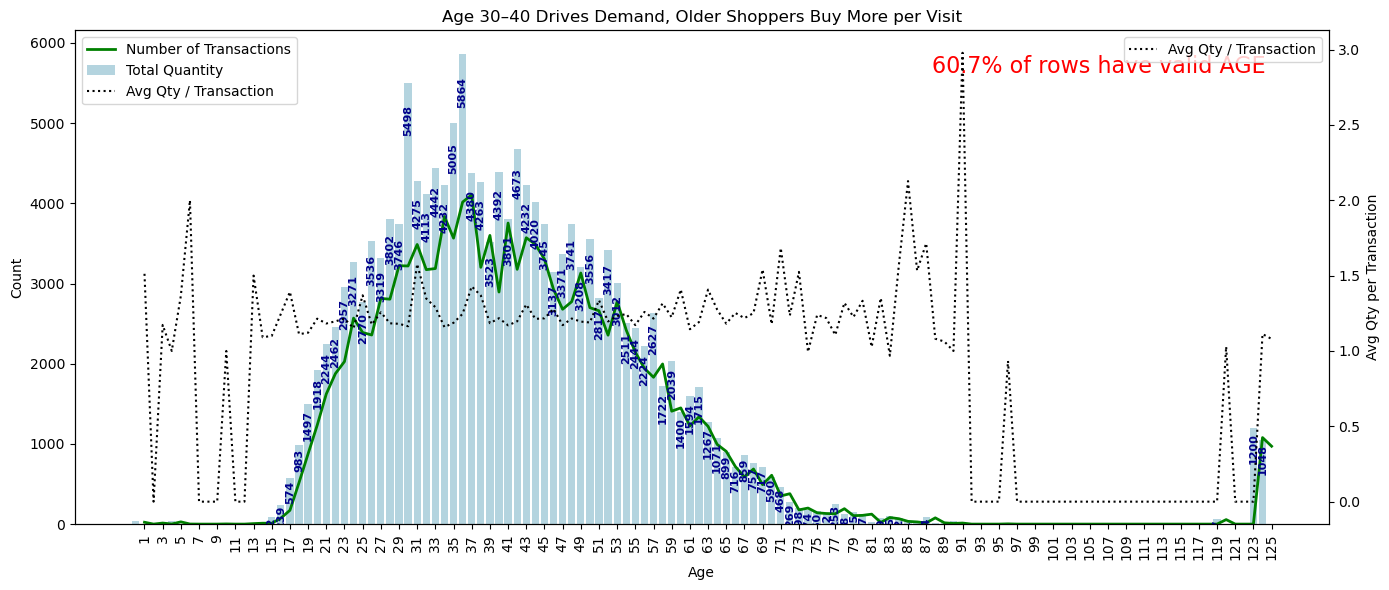

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Filter out invalid/missing AGE values
age_data = data[data['AGE'].notnull() & (data['AGE'] > 0)]

# Calculate % of valid AGE entries
non_null_pct = 100 * len(age_data) / len(data)

# Group and compute necessary stats
age_summary = age_data.groupby('AGE').agg(
    total_quantity=('QUANTITY', 'sum'),
    transaction_count=('TRANX_ID', 'count')
).reset_index()

# Calculate avg quantity per transaction
age_summary['avg_qnty_pr_txn'] = age_summary['total_quantity'] / age_summary['transaction_count']

# Ensure full age range is present
full_age_range = pd.DataFrame({'AGE': range(1, 126)})
age_summary = full_age_range.merge(age_summary, on='AGE', how='left')

# Fill missing with zeros where needed
age_summary[['total_quantity', 'transaction_count', 'avg_qnty_pr_txn']] = age_summary[
    ['total_quantity', 'transaction_count', 'avg_qnty_pr_txn']
].fillna(0)

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 6))


# Barplot for total quantity
barplot = sns.barplot(x='AGE', y='total_quantity', data=age_summary, color='lightblue', label='Total Quantity', ax=ax1)

# Add vertical labels at the top of each bar
for bar, value in zip(barplot.patches, age_summary['total_quantity']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    barplot.text(
        x, y - (y * 0.05),  # slightly below tip, inside the bar
        f"{int(value)}",
        ha='center', va='top',
        rotation=90,
        fontsize=8,
        fontweight='bold',
        color='darkblue',
        clip_on=True  # avoids overflow
    )

# Lineplot for transaction count (primary y-axis)
sns.lineplot(x='AGE', y='transaction_count', data=age_summary, color='green', label='Number of Transactions', ax=ax1, linewidth=2)

# Format x-axis
ages = age_summary['AGE'].astype(int)
ax1.set_xticks(ages[::2])
ax1.set_xticklabels(ages[::2])
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=90)

# Second y-axis for avg quantity
ax2 = ax1.twinx()
sns.lineplot(x='AGE', y='avg_qnty_pr_txn', data=age_summary, ax=ax2, color='black', linestyle='dotted', label='Avg Qty / Transaction')
ax2.set_ylabel('Avg Qty per Transaction')

# Title and annotations
plt.title('Age 30–40 Drives Demand, Older Shoppers Buy More per Visit')
ax1.text(
    0.95, 0.95,
    f"{non_null_pct:.1f}% of rows have valid AGE",
    fontsize=16, color='red', ha='right', va='top',
    transform=ax1.transAxes
)

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)


plt.tight_layout()
plt.show()


### Insights from Age-Based Analysis

- **Shoppers aged 30–40** contribute the highest total quantity and transaction volume across the dataset.
- **Average quantity per transaction** increases noticeably among older age groups (50+), despite fewer overall transactions.
- There is a **significant drop-off in demand** after age 60, though select older segments (e.g. 85+, 91) show unusually high quantities per transaction — possibly outliers.
- Younger customers (under 25) are present but contribute much less to overall volume.
- **Only 60.7%** of rows have a valid `AGE`, so downstream modeling will need to consider how to handle missing or placeholder age values.


## Geographic Analysis

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_bar_graph(data, geo_col):
    # Treat "Unknown" as missing
    geo_data = data[[geo_col, 'QUANTITY']].copy()
    geo_data[geo_col] = geo_data[geo_col].replace("Unknown", pd.NA)
    geo_data = geo_data.dropna(subset=[geo_col])
    
    # Usable data percentage
    usable_pct = 100 * len(geo_data) / len(data)
    
    # Group and calculate metrics
    summary = geo_data.groupby(geo_col).agg(
        total_quantity=('QUANTITY', 'sum'),
        transaction_count=('QUANTITY', 'count')
    ).reset_index()
    
    summary['avg_qnty_pr_txn'] = summary['total_quantity'] / summary['transaction_count']
    summary = summary.sort_values(by='transaction_count', ascending=False)
    
    # Plot setup
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Barplot for total quantity
    barplot = sns.barplot(x=geo_col, y='total_quantity', data=summary, color='lightblue', ax=ax1, label='Total Quantity')
    ax1.set_ylabel('Quantity / Transactions')
    ax1.set_xlabel('')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add quantity data labels
    for bar, value in zip(barplot.patches, summary['total_quantity']):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        barplot.text(
            x, y - (y * 0.05),  # slightly inside the bar
            f"{int(value)}",
            ha='center', va='top',
            rotation=90,
            fontsize=8,
            fontweight='bold',
            color='darkblue',
            clip_on=True
        )
    
    # Line for transaction count (same left axis)
    sns.lineplot(x=geo_col, y='transaction_count', data=summary, color='green', ax=ax1, label='Number of Transactions', linewidth=2)
    
    # Second y-axis for avg quantity per transaction
    ax2 = ax1.twinx()
    sns.lineplot(x=geo_col, y='avg_qnty_pr_txn', data=summary, ax=ax2, color='black', linestyle='dotted', label='Avg Qty / Transaction')
    ax2.set_ylabel('Avg Qty per Transaction')
    ax2.set_ylim(bottom=0)  # Ensure right axis (avg qty per txn) starts at 0
    ax2.set_ylim(0, 1.8)

    # Add title and red annotation
    plt.title(f"{geo_col}: Demand Breakdown")
    ax1.text(
        0.95, 0.95,
        f"{usable_pct:.1f}% of rows have valid {geo_col}",
        fontsize=14, color='red', ha='right', va='top',
        transform=ax1.transAxes
    )
    
    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2)
    
    plt.tight_layout()
    plt.show()



### Residency

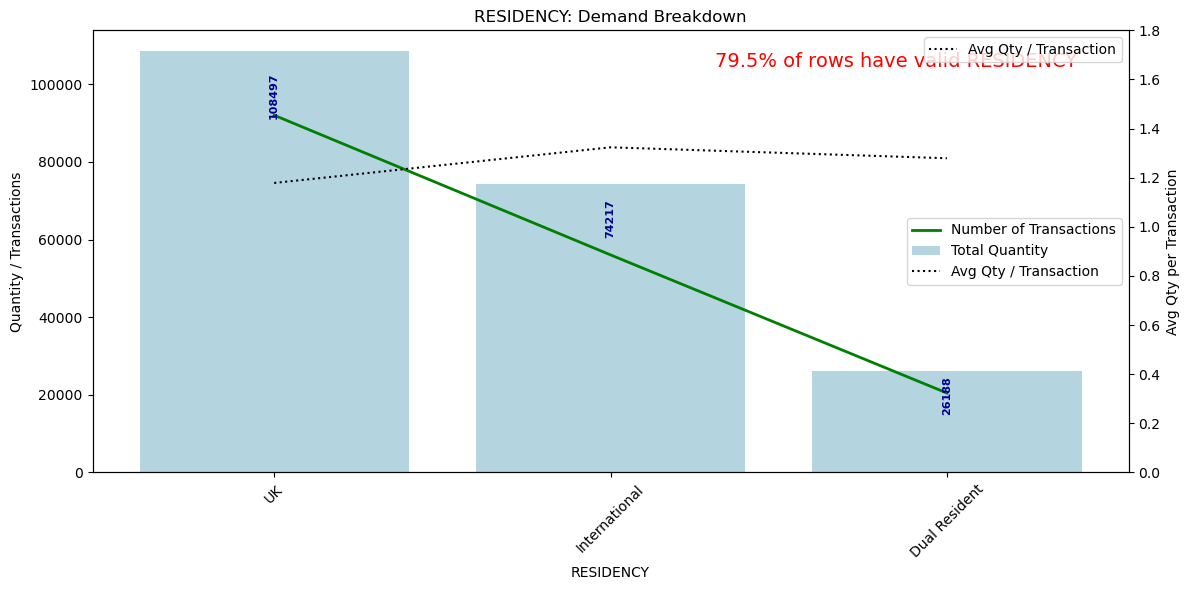

In [22]:
# Pick your column here: 'RESIDENCY' or 'CALC_COUNTRY_GP'
geo_col = 'RESIDENCY'

plot_bar_graph(data, geo_col)

### Country

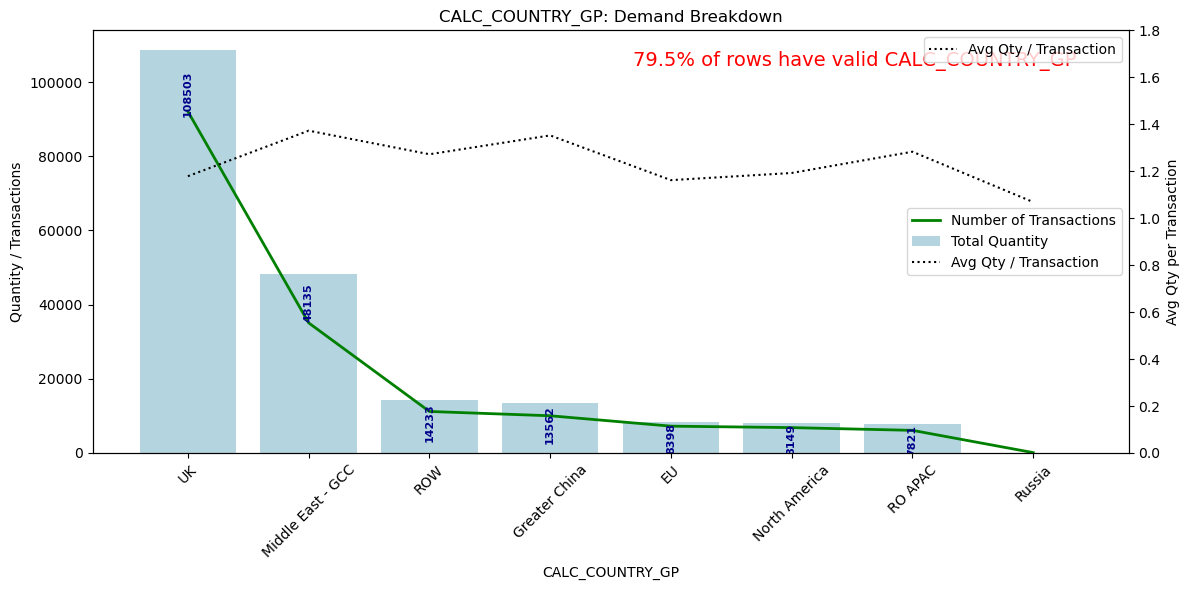

In [23]:
geo_col = 'CALC_COUNTRY_GP'
plot_bar_graph(data, geo_col)

### Country over time

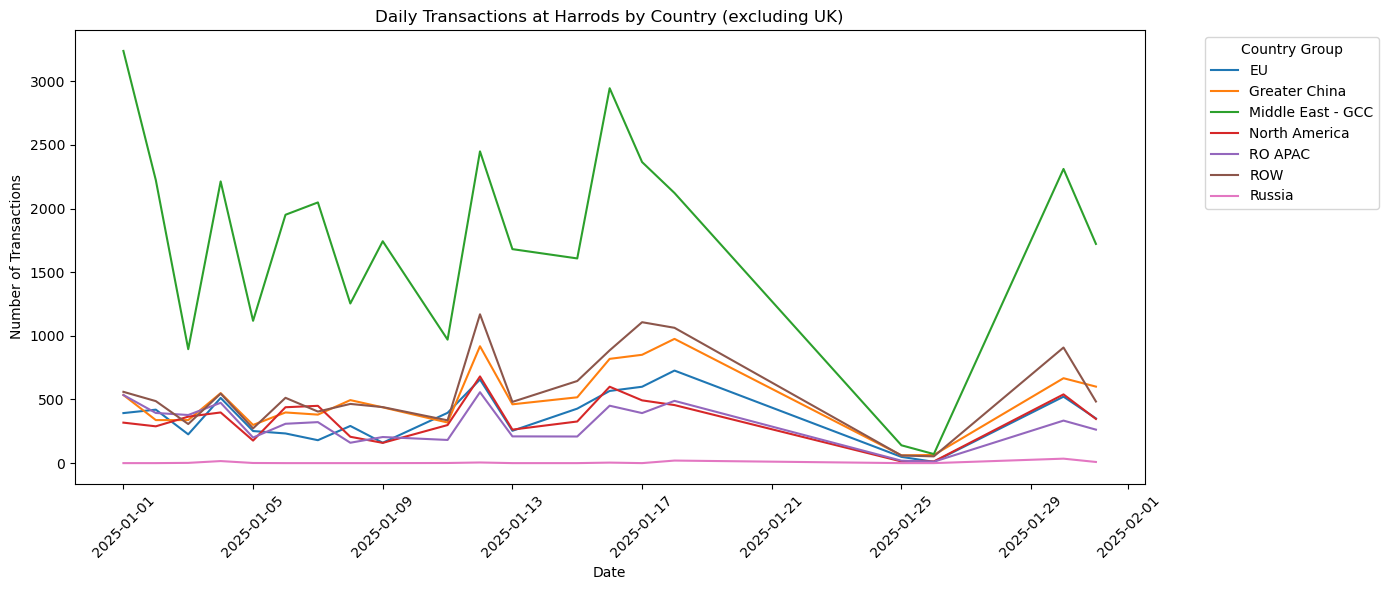

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv("data/Harrods January Transactions_LBS.csv", parse_dates=['CAL_DAY'])

# Copy to avoid overwriting
tx_data = data.copy()

# Filter out UK
tx_data = tx_data[tx_data['CALC_COUNTRY_GP'] != 'UK']

# Group: daily transaction count per country
daily_tx = tx_data.groupby(['CAL_DAY', 'CALC_COUNTRY_GP'])['TRANX_ID'].count().reset_index()

# Pivot to wide format
pivot_tx = daily_tx.pivot(index='CAL_DAY', columns='CALC_COUNTRY_GP', values='TRANX_ID').fillna(0)

# Plot
plt.figure(figsize=(14, 6))

for country in pivot_tx.columns:
    plt.plot(pivot_tx.index, pivot_tx[country], label=country)

plt.title('Daily Transactions at Harrods by Country (excluding UK)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend(title='Country Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


January 25th and 26th have weirdly low number of transactions... the data looks 'wonky'. Let's investigate

In [ ]:
import pandas as pd

# Copy the original dataset to work with
tx_data = data.copy()

# Make sure CAL_DAY is datetime
tx_data['CAL_DAY'] = pd.to_datetime(tx_data['CAL_DAY'])

# Group: daily transaction count per country
daily_tx = tx_data.groupby(['CAL_DAY', 'CALC_COUNTRY_GP'])['TRANX_ID'].count().reset_index()
print("Total Transactions:",tx_data.TRANX_ID.sum())
# Pivot to wide format
pivot_tx = daily_tx.pivot(index='CAL_DAY', columns='CALC_COUNTRY_GP', values='TRANX_ID').fillna(0)

# Add day of week
pivot_tx['Day of Week'] = pivot_tx.index.day_name()

# Reorder columns: day of week first
cols = ['Day of Week'] + [col for col in pivot_tx.columns if col != 'Day of Week']
pivot_tx = pivot_tx[cols]

# Display the table
display(pivot_tx)

In [7]:
raw_data = pd.read_csv("data/Harrods January Transactions_LBS.csv")  # no parse_dates
print(raw_data['CAL_DAY'].unique())


['2025-01-04' '2025-01-02' '2025-01-03' '2025-01-07' '2025-01-30'
 '2025-01-05' '2025-01-31' '2025-01-09' '2025-01-01' '2025-01-08'
 '2025-01-06' '2025-01-12' '2025-01-13' '2025-01-16' '2025-01-17'
 '2025-01-18' '2025-01-15' '2025-01-11' '2025-01-25' '2025-01-26']


## Customer Tier Level Analysis

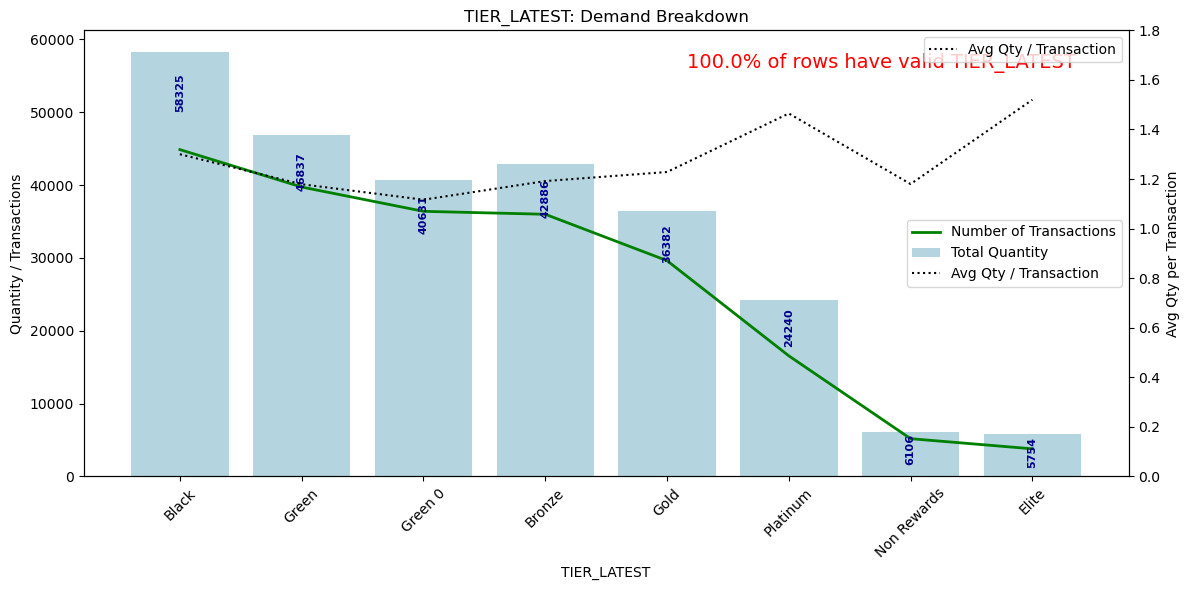

In [25]:
col = 'TIER_LATEST'
plot_bar_graph(data, col)

### Insights from Customer Tier Analysis

- **Black** tier customers generate the highest number of transactions, followed by **Green**, **Bronze**, **Gold**, and **Platinum**.
- **Non Rewards** and **Elite** tiers represent only a small share of total transactions.
- Despite fewer transactions, **Elite** customers show the **highest average quantity per transaction**, indicating potential high-value behavior.
- The `TIER_LATEST` field is well populated, with over 99% of records usable for analysis.


Item Purchase Volume by Customer Residency and Country

C:\Users\mkant\AppData\Local\Temp\ipykernel_31972\2977889867.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  txn_counts.groupby(['RESIDENCY_CLEAN', 'txn_capped'])


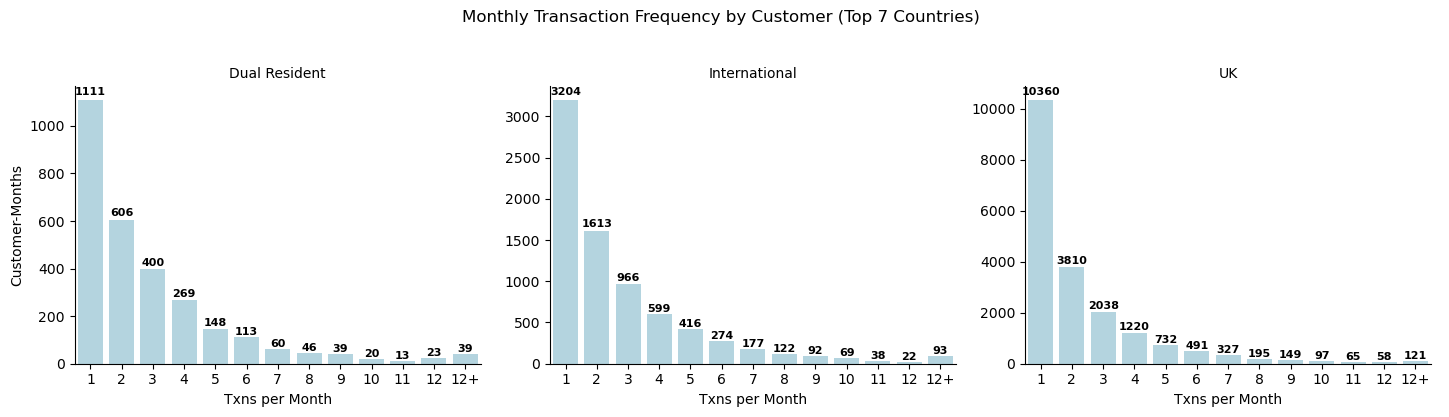

In [28]:
# Clean up RESIDENCY column
data['RESIDENCY_CLEAN'] = data['RESIDENCY'].replace('Unknown', pd.NA)
valid_data = data.dropna(subset=['RESIDENCY_CLEAN'])

# Get top 7 countries by unique transaction count
top_countries = (
    valid_data.groupby('RESIDENCY_CLEAN')['TRANX_ID']
    .nunique()
    .sort_values(ascending=False)
    .head(7)
    .index
)

# Filter to top countries
top_data = valid_data[valid_data['RESIDENCY_CLEAN'].isin(top_countries)].copy()

# Add year-month field
top_data['YEAR_MONTH'] = top_data['TYEAR'].astype(str) + '-' + top_data['MNTH'].astype(str).str.zfill(2)

# Group: unique transaction IDs per customer per month
txn_counts = (
    top_data.groupby(['RESIDENCY_CLEAN', 'ZCUSTOMER', 'YEAR_MONTH'])['TRANX_ID']
    .nunique()
    .reset_index(name='txn_count')
)

# Cap values at "12+"
txn_counts['txn_capped'] = txn_counts['txn_count'].apply(lambda x: str(x) if x <= 12 else '12+')

# Set proper categorical order
cat_order = [str(i) for i in range(1, 13)] + ['12+']
txn_counts['txn_capped'] = pd.Categorical(txn_counts['txn_capped'], categories=cat_order, ordered=True)

# Count number of customer-months per txn count bucket
plot_data = (
    txn_counts.groupby(['RESIDENCY_CLEAN', 'txn_capped'])
    .size()
    .reset_index(name='count')
)

# Plot
g = sns.catplot(
    data=plot_data,
    x='txn_capped', y='count',
    col='RESIDENCY_CLEAN',
    col_wrap=3,
    kind='bar',
    color='lightblue',
    sharey=False,
    height=4, aspect=1.2
)

g.set_titles("{col_name}")
g.set_axis_labels("Txns per Month", "Customer-Months")
g.fig.suptitle("Monthly Transaction Frequency by Customer (Top 7 Countries)", y=1.03)

# Add count labels to bars
for ax in g.axes.flatten():
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2, height + 0.01 * height,
                f"{int(height)}",
                ha='center', va='bottom', fontsize=8, fontweight='bold'
            )

plt.tight_layout()
plt.show()


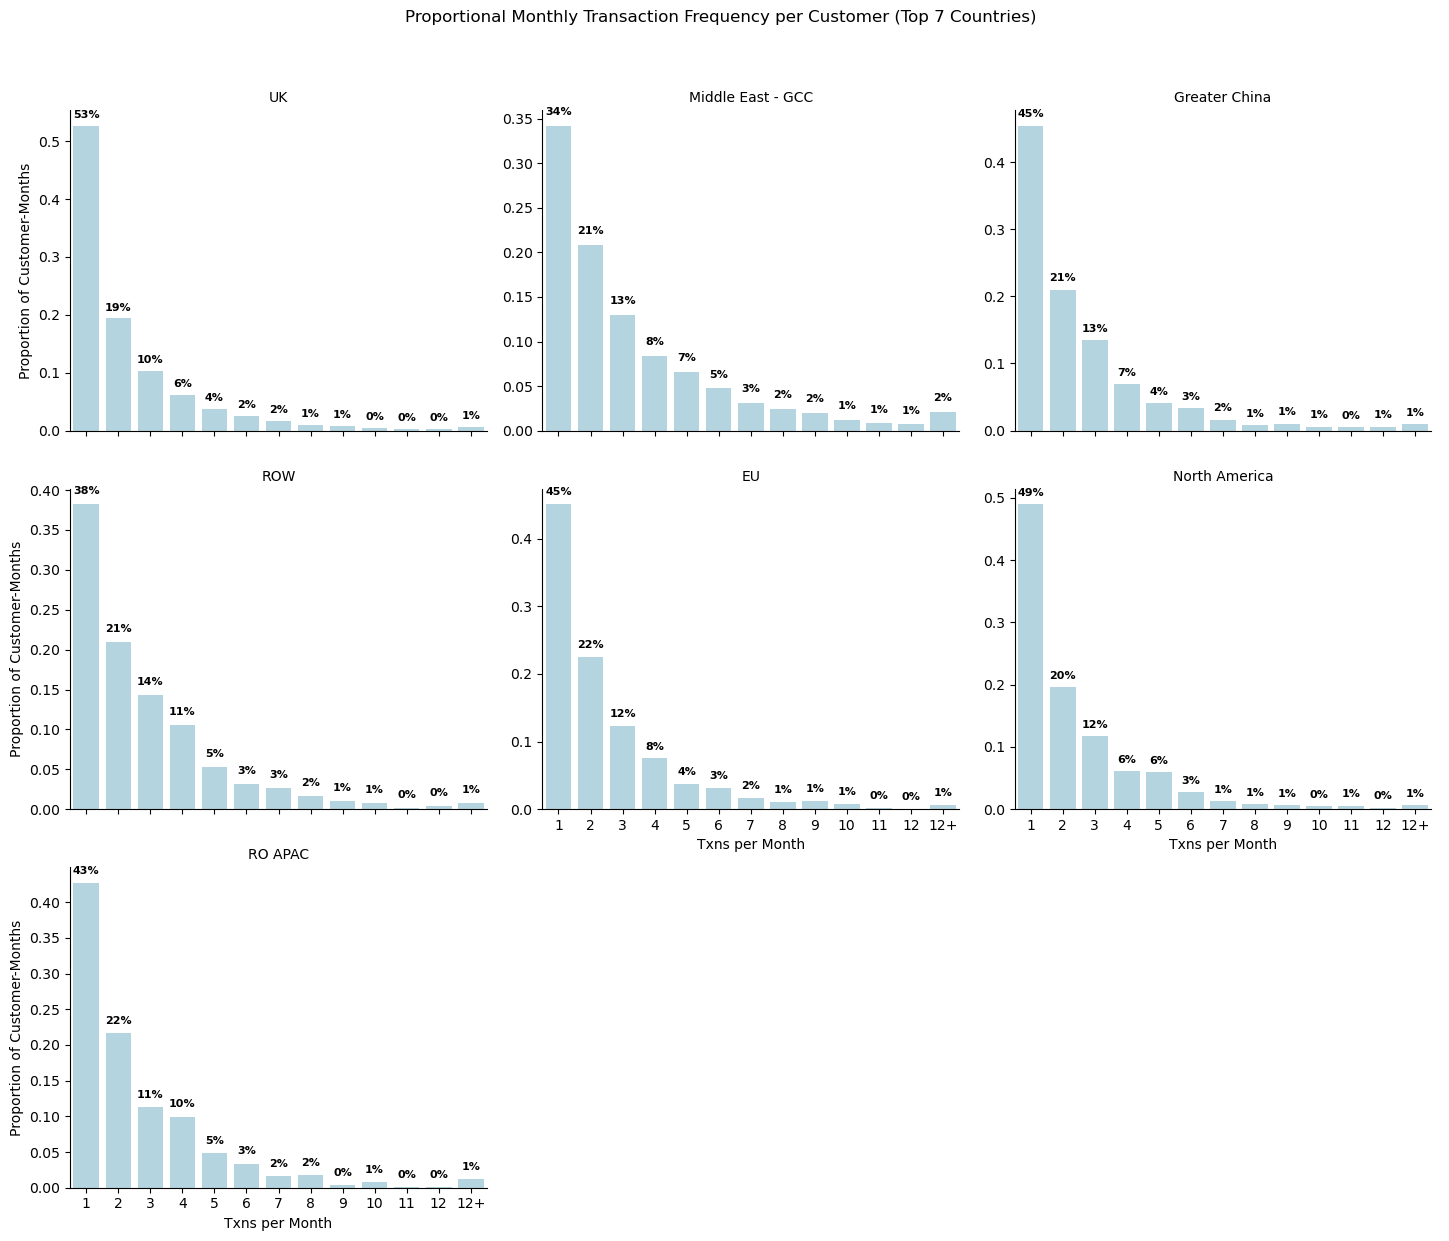

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean CALC_COUNTRY_GP
data['COUNTRY_CLEAN'] = data['CALC_COUNTRY_GP'].replace('Unknown', pd.NA)
valid_data = data.dropna(subset=['COUNTRY_CLEAN'])

# Get top 7 countries by unique transaction count
top_countries = (
    valid_data.groupby('COUNTRY_CLEAN')['TRANX_ID']
    .nunique()
    .sort_values(ascending=False)
    .head(7)
)

# Filter data
top_data = valid_data[valid_data['COUNTRY_CLEAN'].isin(top_countries.index)].copy()

# Add year-month
top_data['YEAR_MONTH'] = top_data['TYEAR'].astype(str) + '-' + top_data['MNTH'].astype(str).str.zfill(2)

# Count unique transactions per customer per month
txn_counts = (
    top_data.groupby(['COUNTRY_CLEAN', 'ZCUSTOMER', 'YEAR_MONTH'])['TRANX_ID']
    .nunique()
    .reset_index(name='txn_count')
)

# Cap at 12+
txn_counts['txn_capped'] = txn_counts['txn_count'].apply(lambda x: str(x) if x <= 12 else '12+')
cat_order = [str(i) for i in range(1, 13)] + ['12+']
txn_counts['txn_capped'] = pd.Categorical(txn_counts['txn_capped'], categories=cat_order, ordered=True)

# Group and normalize within each country
raw_counts = txn_counts.groupby(['COUNTRY_CLEAN', 'txn_capped'], observed=True).size().reset_index(name='count')
total_counts = raw_counts.groupby('COUNTRY_CLEAN')['count'].transform('sum')
raw_counts['proportion'] = raw_counts['count'] / total_counts

# Sort countries for plotting
raw_counts['COUNTRY_CLEAN'] = pd.Categorical(raw_counts['COUNTRY_CLEAN'],
                                              categories=top_countries.index.tolist(),
                                              ordered=True)

# Plot
g = sns.catplot(
    data=raw_counts,
    x='txn_capped', y='proportion',
    col='COUNTRY_CLEAN',
    col_wrap=3,
    kind='bar',
    color='lightblue',
    sharey=False,
    height=4, aspect=1.2
)

g.set_titles("{col_name}")
g.set_axis_labels("Txns per Month", "Proportion of Customer-Months")
g.fig.suptitle("Proportional Monthly Transaction Frequency per Customer (Top 7 Countries)", y=1.03)

# Add % labels
for ax in g.axes.flatten():
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2, height + 0.01,
                f"{height:.0%}",
                ha='center', va='bottom', fontsize=8, fontweight='bold'
            )

plt.tight_layout()
plt.show()


## Evaluating Grouping Compression

In [129]:
import pandas as pd

def evaluate_grouping_compression(data: pd.DataFrame):
    # Columns to group by
    group_columns = [
        "CAL_DAY", "CHANNEL", "SITE", "MCH3", "GENDER",
        "SPENDBAND_LATEST", "SPENDBAND_POINTOFTRANX", "AGE_GROUP",
        "RESIDENCY", "TIER_LATEST", "CALC_COUNTRY_GP",
        "PRIVATE_SHOPPING_TRANSACTION", "PRIVATE_SHOPPING_CUST_FLAG",
        "ZPERSONA", "ZISREWTR"
    ]

    # Original row count
    original_rows = len(data)

    # Grouped row count
    grouped_data = data.groupby(group_columns).size().reset_index(name="count")
    grouped_rows = len(grouped_data)

    # Compression ratio
    compression_ratio = grouped_rows / original_rows

    print(f"Original rows: {original_rows}")
    print(f"Grouped rows: {grouped_rows}")
    print(f"Compression ratio: {1 - compression_ratio:.4f} (closer to 1 means more compression)")



In [131]:
evaluate_grouping_compression(data)

Original rows: 212107
Grouped rows: 1573
Compression ratio: 0.9926 (closer to 1 means more compression)


# Exploratory Data Analysis - Grouped Transactions Data

## Countries Over Time

### Graphed, not Normalized

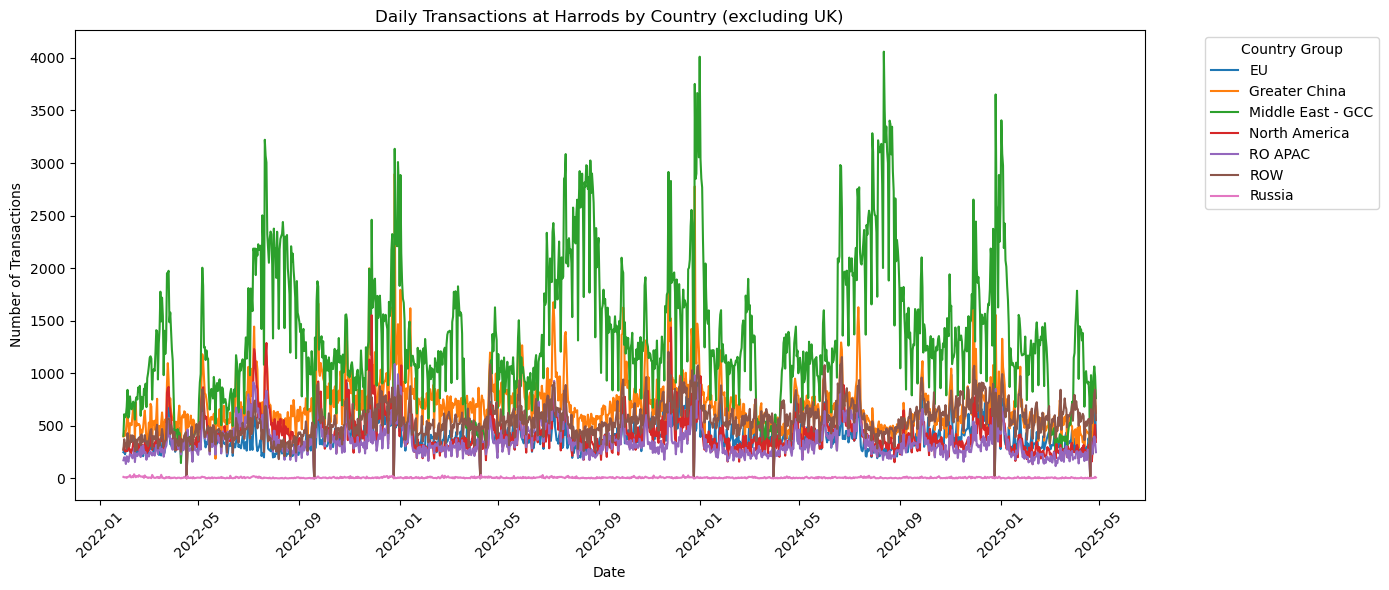

CALC_COUNTRY_GP,Day of Week,EU,Greater China,Middle East - GCC,North America,RO APAC,ROW,Russia
CAL_DAY,,,,,,,,
2022-01-30,Sunday,249.0,398.0,404.0,274.0,172.0,272.0,14.0
2022-01-31,Monday,258.0,450.0,610.0,308.0,201.0,372.0,10.0
2022-02-01,Tuesday,229.0,405.0,581.0,256.0,191.0,325.0,11.0
2022-02-02,Wednesday,268.0,450.0,595.0,259.0,137.0,329.0,10.0
2022-02-03,Thursday,271.0,535.0,679.0,261.0,211.0,285.0,5.0
...,...,...,...,...,...,...,...,...
2025-04-23,Wednesday,232.0,397.0,635.0,270.0,245.0,541.0,3.0
2025-04-24,Thursday,482.0,734.0,964.0,378.0,319.0,691.0,5.0
2025-04-25,Friday,547.0,907.0,1065.0,419.0,399.0,802.0,4.0


Total Transactions: 6111401


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
grouped_transactions_raw = pd.read_csv("data/RAW_LBS_TEAM1_20250428.csv", parse_dates=['CAL_DAY'])

# Copy to avoid touching raw data
tx_data = grouped_transactions_raw.copy()

# Make sure CAL_DAY is datetime
tx_data['CAL_DAY'] = pd.to_datetime(tx_data['CAL_DAY'])

# Filter out UK
tx_data = tx_data[tx_data['CALC_COUNTRY_GP'] != 'UK']

# Group: daily total transactions per country
daily_tx = tx_data.groupby(['CAL_DAY', 'CALC_COUNTRY_GP'])['TRANX_TTL'].sum().reset_index()

# Pivot to wide format
pivot_tx = daily_tx.pivot(index='CAL_DAY', columns='CALC_COUNTRY_GP', values='TRANX_TTL').fillna(0)

# Plot
plt.figure(figsize=(14, 6))

for country in pivot_tx.columns:
    plt.plot(pivot_tx.index, pivot_tx[country], label=country)

plt.title('Daily Transactions at Harrods by Country (excluding UK)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend(title='Country Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Add day of week to pivot table
pivot_tx['Day of Week'] = pivot_tx.index.day_name()

# Reorder columns: Day of Week first
cols = ['Day of Week'] + [col for col in pivot_tx.columns if col != 'Day of Week']
pivot_tx = pivot_tx[cols]

# Display the final table
display(pivot_tx)

# Quick total transaction summary
print("Total Transactions:", tx_data['TRANX_TTL'].sum())


### Middle East Days with Low Transactions

CALC_COUNTRY_GP,Middle East - GCC
CAL_DAY,
2022-04-17,1.0
2023-04-09,2.0
2022-09-19,3.0
2024-03-31,11.0
2025-04-20,28.0
2022-12-25,33.0
2023-12-25,57.0
2024-12-25,62.0
2022-04-10,146.0


Number of days with transactions below 500: 104


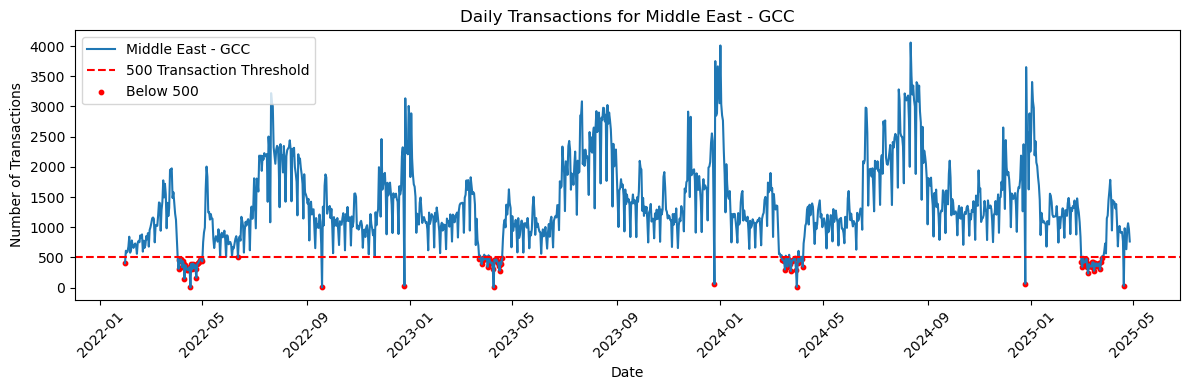

In [27]:
# First, isolate "Middle East - GCC"
# Isolate Middle East - GCC
gcc_data = pivot_tx[['Middle East - GCC']].copy()

# Find bottom 20 days with lowest transactions
lowest_20_days = gcc_data.sort_values(by='Middle East - GCC', ascending=True).head(20)

# Display
display(lowest_20_days)
# Display
print(f"Number of days with transactions below 500: {len(low_tx_days)}")


# Optional: plot it
plt.figure(figsize=(12, 4))
plt.plot(gcc_data.index, gcc_data['Middle East - GCC'], label='Middle East - GCC')
plt.axhline(500, color='red', linestyle='--', label='500 Transaction Threshold')
plt.scatter(low_tx_days.index, low_tx_days['Middle East - GCC'], color='red', s=10, label='Below 500')
plt.title('Daily Transactions for Middle East - GCC')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Notes on Low Transaction Days – Middle East - GCC

- **Most days with very low transactions** correspond to **UK public holidays** or **major national events**.
- **Key patterns identified:**

| Date | Likely Reason |
|:-----|:--------------|
| 2022-04-10 to 2022-04-24 (various) | Easter period (Palm Sunday, Good Friday, Easter Sunday) |
| 2022-09-19 | Queen Elizabeth II’s Funeral (national holiday, Harrods likely closed) |
| 2022-12-25, 2023-12-25, 2024-12-25 | Christmas Day (Harrods closed) |
| 2024-03-24 to 2025-04-20 (various) | Easter period (Palm Sunday, Easter Sunday) |

- **Easter** varies between March and April each year, explaining why the low points are spread across those months.
- **Christmas** consistently causes near-zero transactions.
- **Overall:** Low transaction days are **not random** — they align with **store closures** and **holiday-driven drops in international traffic**.


### China Days with Low Transactions

CALC_COUNTRY_GP,Greater China
CAL_DAY,
2022-04-17,1.0
2022-09-19,2.0
2022-12-25,3.0
2024-12-25,5.0
2023-04-09,5.0
2024-03-31,6.0
2023-12-25,7.0
2025-04-20,10.0
2022-05-22,187.0


Number of days with transactions below 300: 19


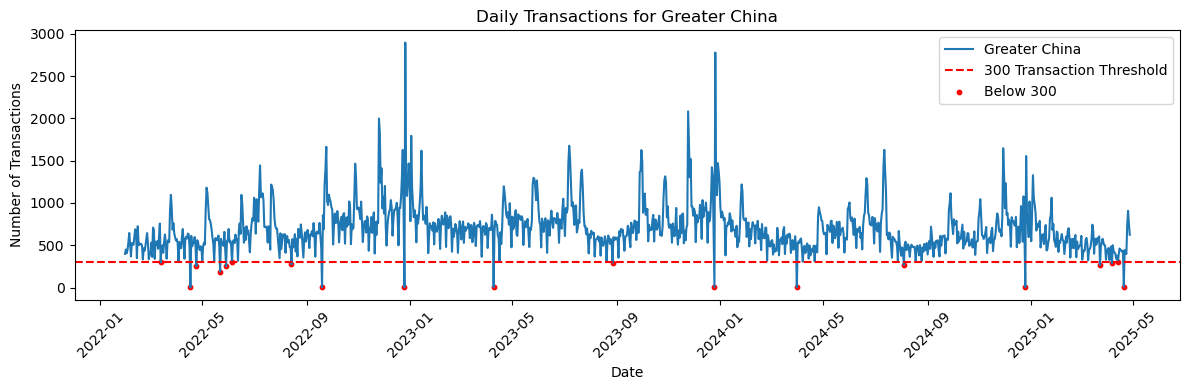

In [40]:
# Isolate Greater China
china_data = pivot_tx[['Greater China']].copy()

# Find bottom 20 days with lowest transactions
lowest_20_days_china = china_data.sort_values(by='Greater China', ascending=True).head(15)

# Display
display(lowest_20_days_china)

# Find all days where transactions are below 300
low_tx_days_china = china_data[china_data['Greater China'] < 300]

# Display how many days below 300
print(f"Number of days with transactions below 300: {len(low_tx_days_china)}")

# Plot
plt.figure(figsize=(12, 4))
plt.plot(china_data.index, china_data['Greater China'], label='Greater China')
plt.axhline(300, color='red', linestyle='--', label='300 Transaction Threshold')
plt.scatter(low_tx_days_china.index, low_tx_days_china['Greater China'], color='red', s=10, label='Below 300')
plt.title('Daily Transactions for Greater China')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Notes on Low Transaction Days – Greater China

- **Most low transaction days for Greater China match major UK or global holidays**, or appear on typical low-travel Sundays.
- **Key patterns identified:**

| Date | Likely Reason |
|:-----|:--------------|
| 2022-04-17 | Easter Sunday |
| 2022-09-19 | Queen Elizabeth II’s Funeral (UK national holiday) |
| 2022-12-25 | Christmas Day (Harrods closed) |
| 2023-12-25 | Christmas Day (Harrods closed) |
| 2024-12-25 | Christmas Day (Harrods closed) |
| 2023-04-09 | Easter Sunday |
| 2024-03-31 | Easter Sunday |
| 2025-04-20 | Easter Sunday |
| 2022-04-24 | Sunday after Easter (low international travel) |
| 2022-05-22 | Regular Sunday (low travel season) |
| 2022-05-29 | Regular Sunday (low travel season) |
| 2025-03-23 | Palm Sunday |
| 2024-08-04 | Summer Sunday (outside peak tourist month) |
| 2022-08-14 | Summer Sunday (outside peak tourist month) |
| 2025-04-06 | Early April Sunday (leading into Easter period) |

- **Easter dates**: Very strong drop around Easter Sundays (March/April each year).
- **Christmas**: Consistently causes near-zero transactions.
- **Summer Sundays** (August): Likely normal lower tourist activity (especially post-COVID patterns).
- **No clear signal of Chinese New Year** affecting Greater China traffic in this dataset — possibly because travelers had not yet fully resumed international trips post-COVID in early 2022–2023.

- **Overall**: Low transaction days align with **major UK holidays** or **typical low-travel Sundays**, not random fluctuations.


# Exploratory Data Analysis - Flights Data Only

## Country Analysis

### Bar Graph

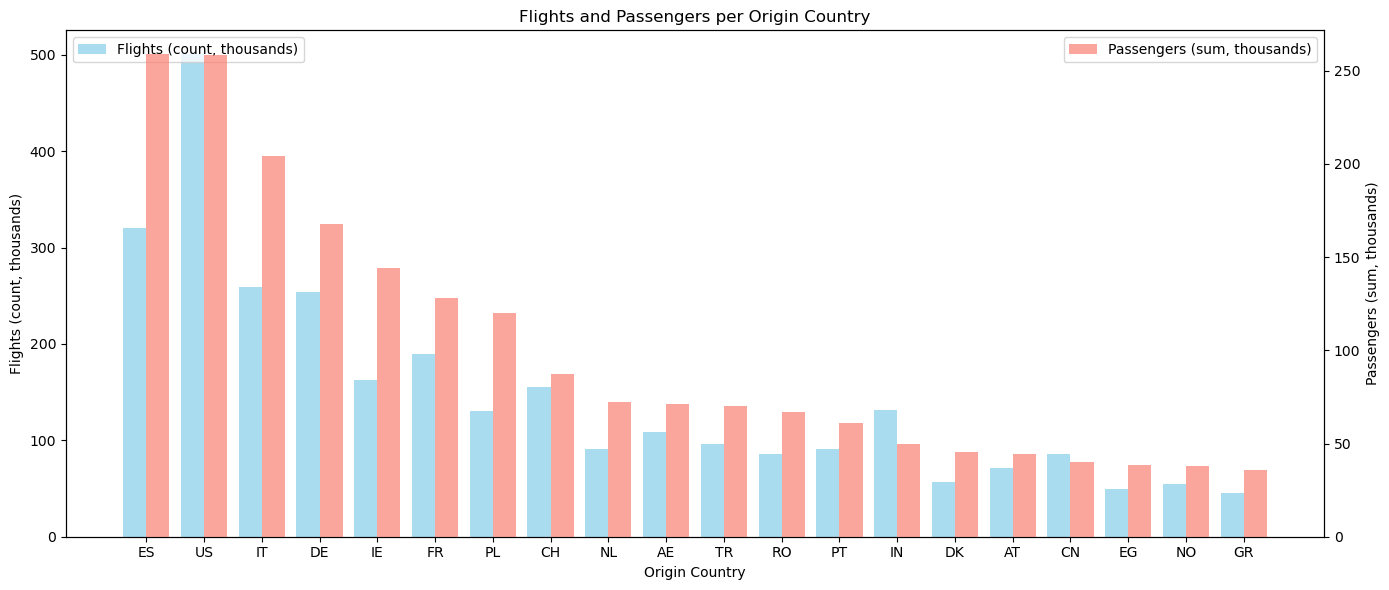

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group only by Origin Country
origin_countries = flight_raw_2.groupby('TRIP_ORIGIN_COUNTRY').agg(
    flights=('PAX', 'count'),
    passengers=('PAX', 'sum')
).reset_index()

# Sort by number of passengers
origin_countries = origin_countries.sort_values('passengers', ascending=False).head(20)  # Top 20 origins

# Set positions
x = np.arange(len(origin_countries))  # the label locations
width = 0.4  # width of the bars

# Plot
fig, ax1 = plt.subplots(figsize=(14,6))
ax2 = ax1.twinx()

# Flights bars (color 1)
flights_bars = ax1.bar(x - width/2, origin_countries['flights'] / 1000, width, label='Flights (count, thousands)', alpha=0.7, color='skyblue')

# Passengers bars (color 2)
passengers_bars = ax2.bar(x + width/2, origin_countries['passengers'] / 1000, width, label='Passengers (sum, thousands)', alpha=0.7, color='salmon')

# Labels and titles
ax1.set_xlabel('Origin Country')
ax1.set_ylabel('Flights (count, thousands)')
ax2.set_ylabel('Passengers (sum, thousands)')
plt.title('Flights and Passengers per Origin Country')

# X-axis labels
plt.xticks(x, origin_countries['TRIP_ORIGIN_COUNTRY'], rotation=90, ha='center')

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Treeplot

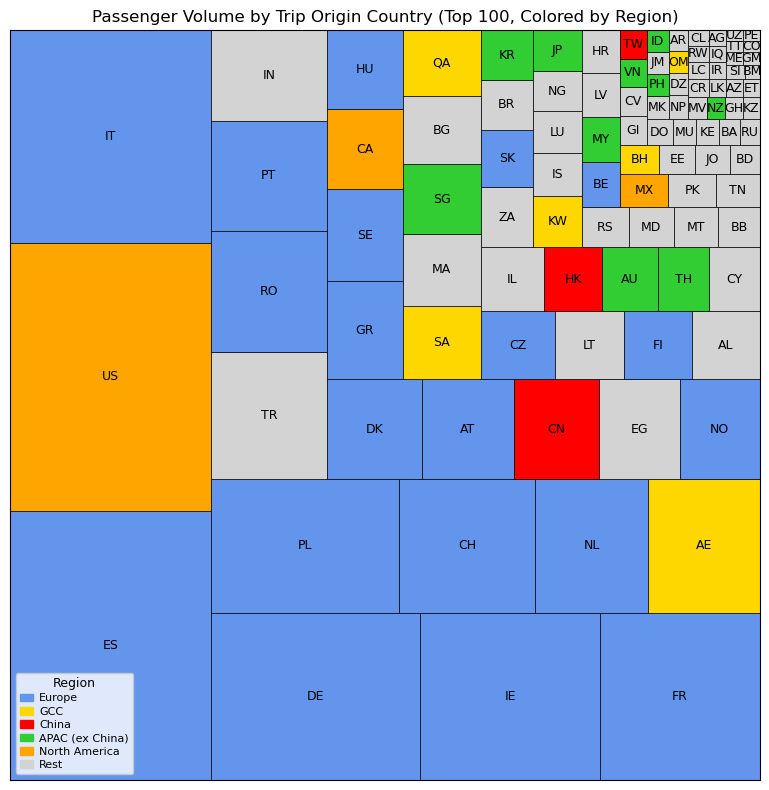

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import matplotlib.patches as mpatches

# Group and summarize
origin_summary = flight_raw_2.groupby('TRIP_ORIGIN_COUNTRY').agg(
    flights=('PAX', 'count'),
    passengers=('PAX', 'sum')
).reset_index()

origin_summary = origin_summary[origin_summary['passengers'] > 0]

# REGION MAPPING
europe = ['FR', 'DE', 'GB', 'IT', 'ES', 'NL', 'CH', 'SE', 'BE', 'AT', 'DK', 'NO', 'FI', 'IE', 'PT', 'PL', 'GR', 'CZ', 'HU', 'RO', 'SK']
gcc = ['AE', 'SA', 'KW', 'QA', 'OM', 'BH']
na = ['US','CA','MX']
china_region = ['CN', 'HK', 'TW']
apac_ex_china = ['JP', 'KR', 'SG', 'MY', 'TH', 'VN', 'PH', 'ID', 'AU', 'NZ']

def assign_region(country):
    if country in europe:
        return 'Europe'
    elif country in na:
        return 'North America'
    elif country in gcc:
        return 'GCC'
    elif country in china_region:
        return 'China'
    elif country in apac_ex_china:
        return 'APAC (ex China)'
    else:
        return 'Rest'

origin_summary['region'] = origin_summary['TRIP_ORIGIN_COUNTRY'].apply(assign_region)

# Color mapping
region_colors = {
    'Europe': 'cornflowerblue',
    'GCC': 'gold',
    'China': 'red',
    'APAC (ex China)': 'limegreen',
    'North America':'orange',
    'Rest': 'lightgrey'
}
origin_summary['color'] = origin_summary['region'].map(region_colors)

# Take top 100 by passenger volume
top_countries = origin_summary.sort_values('passengers', ascending=False).head(100).reset_index(drop=True)

# Treemap setup
sizes = top_countries['passengers']
labels = top_countries['TRIP_ORIGIN_COUNTRY']
colors = top_countries['color']

norm_sizes = squarify.normalize_sizes(sizes, 100, 100)
rects = squarify.squarify(norm_sizes, 0, 0, 100, 100)

# Plot manually
fig, ax = plt.subplots(figsize=(14, 8))
for i, rect in enumerate(rects):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    ax.add_patch(plt.Rectangle((x, y), dx, dy,
                               facecolor=colors[i],
                               edgecolor='black',
                               linewidth=0.5))
    ax.text(x + dx/2, y + dy/2, labels[i],
            ha='center', va='center', fontsize=9, clip_on=True)

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title('Passenger Volume by Trip Origin Country (Top 100, Colored by Region)')

# Legend
legend_handles = [mpatches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(
    handles=legend_handles,
    loc='lower left',
    title='Region',
    fontsize=8,
    title_fontsize=9,
    handlelength=1.2,
    handletextpad=0.5,
    labelspacing=0.3
)

plt.tight_layout()
plt.show()


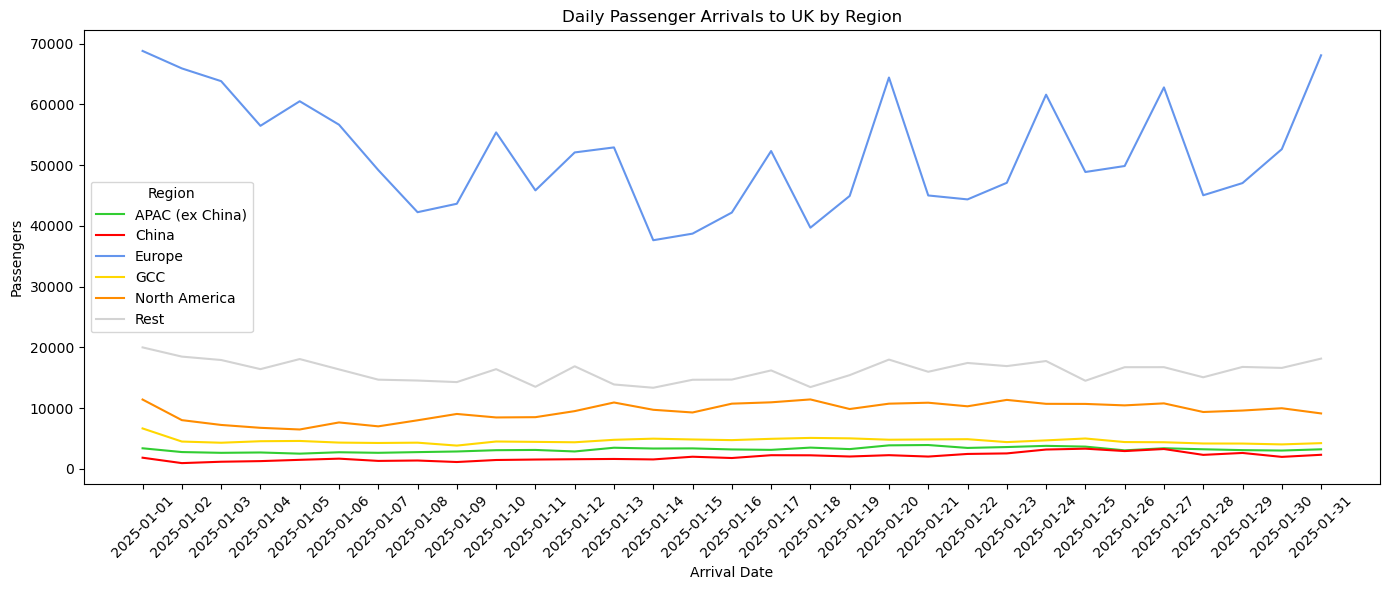

In [186]:
# Create a copy to work with
df = flight_raw_2.copy()

# REGION MAPPING
europe = ['FR', 'DE', 'GB', 'IT', 'ES', 'NL', 'CH', 'SE', 'BE', 'AT', 'DK', 'NO', 'FI', 'IE', 'PT', 'PL', 'GR', 'CZ', 'HU', 'RO', 'SK']
gcc = ['AE', 'SA', 'KW', 'QA', 'OM', 'BH']
china_region = ['CN', 'HK', 'TW']
apac_ex_china = ['JP', 'KR', 'SG', 'MY', 'TH', 'VN', 'PH', 'ID', 'AU', 'NZ']
north_america = ['US', 'CA', 'MX']

def assign_region(country):
    if country in europe:
        return 'Europe'
    elif country in gcc:
        return 'GCC'
    elif country in china_region:
        return 'China'
    elif country in apac_ex_china:
        return 'APAC (ex China)'
    elif country in north_america:
        return 'North America'
    else:
        return 'Rest'

df['region'] = df['TRIP_ORIGIN_COUNTRY'].apply(assign_region)

# Group by arrival date and region
daily_region_arrivals = df.groupby(['FLIGHT_LEG_ARRIVAL_DATE', 'region'])['PAX'].sum().reset_index()

# Pivot to wide format for plotting
pivoted = daily_region_arrivals.pivot(index='FLIGHT_LEG_ARRIVAL_DATE', columns='region', values='PAX').fillna(0)

# Plot
plt.figure(figsize=(14, 6))
colors = {
    'Europe': 'cornflowerblue',
    'GCC': 'gold',
    'China': 'red',
    'APAC (ex China)': 'limegreen',
    'North America': 'darkorange',
    'Rest': 'lightgrey'
}

for region in pivoted.columns:
    plt.plot(pivoted.index, pivoted[region], label=region, color=colors.get(region, 'black'))

plt.title('Daily Passenger Arrivals to UK by Region')
plt.xlabel('Arrival Date')
plt.ylabel('Passengers')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


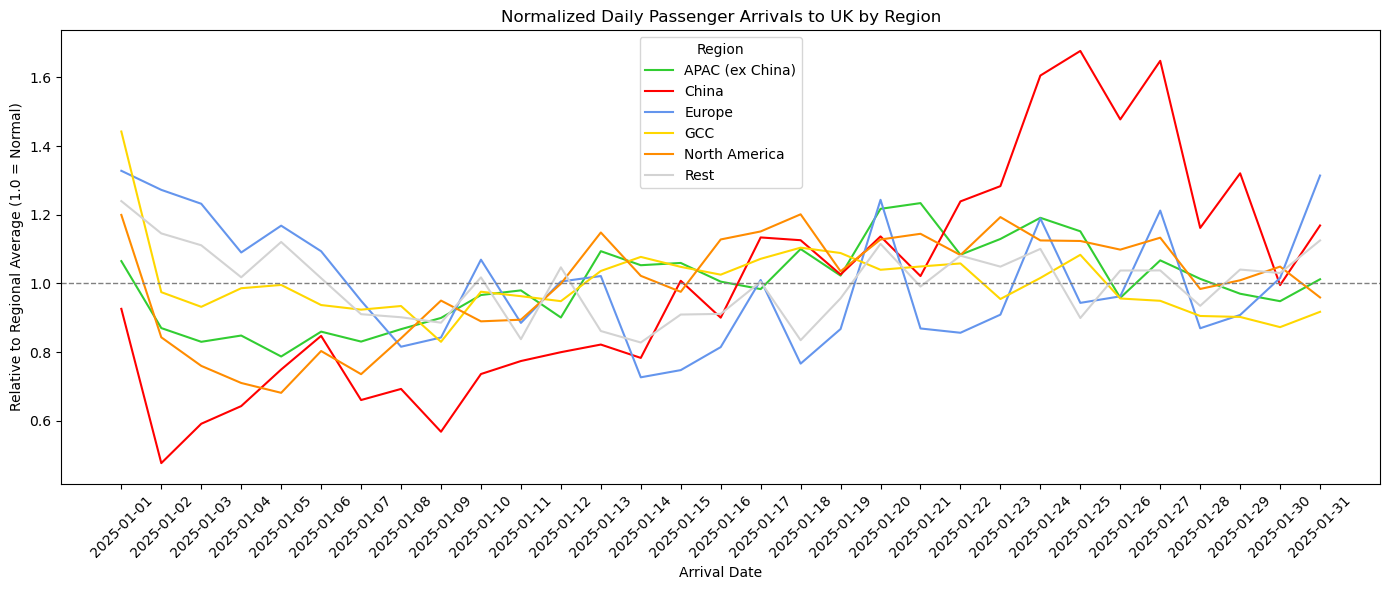

In [188]:
# Normalizing daily arrivals per region
pivoted_normalized = pivoted.divide(pivoted.mean())

# Plot
plt.figure(figsize=(14, 6))
for region in pivoted_normalized.columns:
    plt.plot(pivoted_normalized.index, pivoted_normalized[region], label=region, color=colors.get(region, 'black'))

plt.title('Normalized Daily Passenger Arrivals to UK by Region')
plt.xlabel('Arrival Date')
plt.ylabel('Relative to Regional Average (1.0 = Normal)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.axhline(1.0, color='grey', linestyle='--', linewidth=1)  # baseline at 1.0
plt.tight_layout()
plt.show()


# Putting Grouped Transactions and Flight Data together

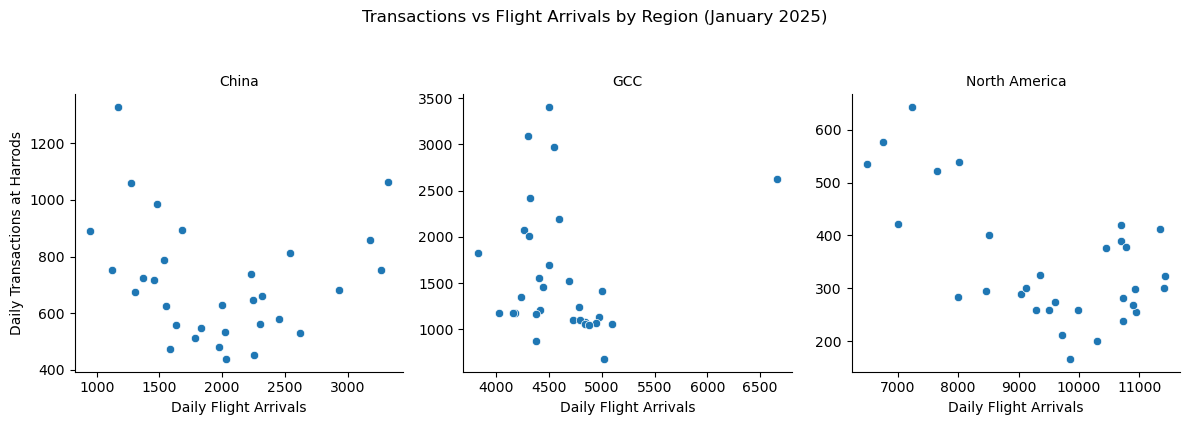

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Prepare flight data ---

# Assume flight_raw_2 already loaded, with 'FLIGHT_LEG_ARRIVAL_DATE' and 'TRIP_ORIGIN_COUNTRY'
flight_raw_2['FLIGHT_LEG_ARRIVAL_DATE'] = pd.to_datetime(flight_raw_2['FLIGHT_LEG_ARRIVAL_DATE'])

# Apply region mapping
def assign_region(country):
    if country in europe:
        return 'Europe'
    elif country in na:
        return 'North America'
    elif country in gcc:
        return 'GCC'
    elif country in china_region:
        return 'China'
    elif country in apac_ex_china:
        return 'APAC (ex China)'
    else:
        return 'Rest'

flight_raw_2['region'] = flight_raw_2['TRIP_ORIGIN_COUNTRY'].apply(assign_region)

# Group by date and region
daily_arrivals = flight_raw_2.groupby(['FLIGHT_LEG_ARRIVAL_DATE', 'region'])['PAX'].sum().reset_index()
daily_arrivals.rename(columns={'FLIGHT_LEG_ARRIVAL_DATE': 'CAL_DAY', 'PAX': 'arrivals'}, inplace=True)

# --- Step 2: Prepare transactions data ---

# Assume tx_data already loaded with 'CAL_DAY', 'CALC_COUNTRY_GP', 'TRANX_TTL'
tx_data['CAL_DAY'] = pd.to_datetime(tx_data['CAL_DAY'])

# Group by date and region
daily_tx = tx_data.groupby(['CAL_DAY', 'CALC_COUNTRY_GP'])['TRANX_TTL'].sum().reset_index()

# Map CALC_COUNTRY_GP to region (you can reuse assign_region if you slightly adapt it for group names)
country_to_region = {
    'Greater China': 'China',
    'Middle East - GCC': 'GCC',
    'Europe': 'Europe',
    'APAC (ex China)': 'APAC (ex China)',
    'North America': 'North America',
    'Rest of World': 'Rest'
}

daily_tx['region'] = daily_tx['CALC_COUNTRY_GP'].map(country_to_region)

# Keep only known regions
daily_tx = daily_tx[daily_tx['region'].notna()]

# --- Step 3: Merge flights and transactions ---

merged = pd.merge(daily_arrivals, daily_tx, on=['CAL_DAY', 'region'], how='inner')

# --- Step 4: Scatter plot ---

import seaborn as sns

# Scatter plot, faceted by region
g = sns.FacetGrid(merged, col='region', col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='arrivals', y='TRANX_TTL')

g.set_axis_labels("Daily Flight Arrivals", "Daily Transactions at Harrods")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Transactions vs Flight Arrivals by Region (January 2025)', y=1.05)
plt.tight_layout()
plt.show()


### Daily Presence Matrix

In [19]:
# Step 1: Prepare flight data
flight_raw_2['FLIGHT_LEG_ARRIVAL_DATE'] = pd.to_datetime(flight_raw_2['FLIGHT_LEG_ARRIVAL_DATE'])

# Apply region mapping
def assign_region(country):
    if country in europe:
        return 'Europe'
    elif country in na:
        return 'North America'
    elif country in gcc:
        return 'GCC'
    elif country in china_region:
        return 'China'
    elif country in apac_ex_china:
        return 'APAC (ex China)'
    else:
        return 'Rest'

flight_raw_2['region'] = flight_raw_2['TRIP_ORIGIN_COUNTRY'].apply(assign_region)

# Only keep positive LOS
flight_raw_2 = flight_raw_2[flight_raw_2['LOS_AT_DESTINATION_NIGHTS'] > 0]

# Step 2: Group first before expanding
grouped_flight = flight_raw_2.groupby([
    'FLIGHT_LEG_ARRIVAL_DATE', 'region', 'LOS_AT_DESTINATION_NIGHTS'
], as_index=False)['PAX'].sum()

# Step 3: Efficiently expand per group
expanded_rows = []

for idx, row in grouped_flight.iterrows():
    arrival = row['FLIGHT_LEG_ARRIVAL_DATE']
    nights = int(row['LOS_AT_DESTINATION_NIGHTS'])
    pax = row['PAX']
    region = row['region']
    
    for day in range(nights):
        stay_date = arrival + pd.Timedelta(days=day)
        expanded_rows.append((stay_date, region, pax))

# Step 4: Build expanded DataFrame
stay_data = pd.DataFrame(expanded_rows, columns=['stay_date', 'region', 'PAX'])

# Step 5: Group: total number of people "present" per day and region
daily_presence = stay_data.groupby(['stay_date', 'region'])['PAX'].sum().reset_index()
daily_presence.rename(columns={'stay_date': 'CAL_DAY', 'PAX': 'people_in_london'}, inplace=True)

# Drop early January days 
daily_presence = daily_presence[daily_presence['CAL_DAY'] > pd.Timestamp('2025-01-05')]

# Also after merging
merged = merged[merged['CAL_DAY'] > pd.Timestamp('2025-01-05')]


# Display sample
display(daily_presence.head())


,CAL_DAY,region,people_in_london
30,2025-01-06,APAC (ex China),6232
31,2025-01-06,China,4143
32,2025-01-06,Europe,12676
33,2025-01-06,GCC,8622
34,2025-01-06,North America,19052


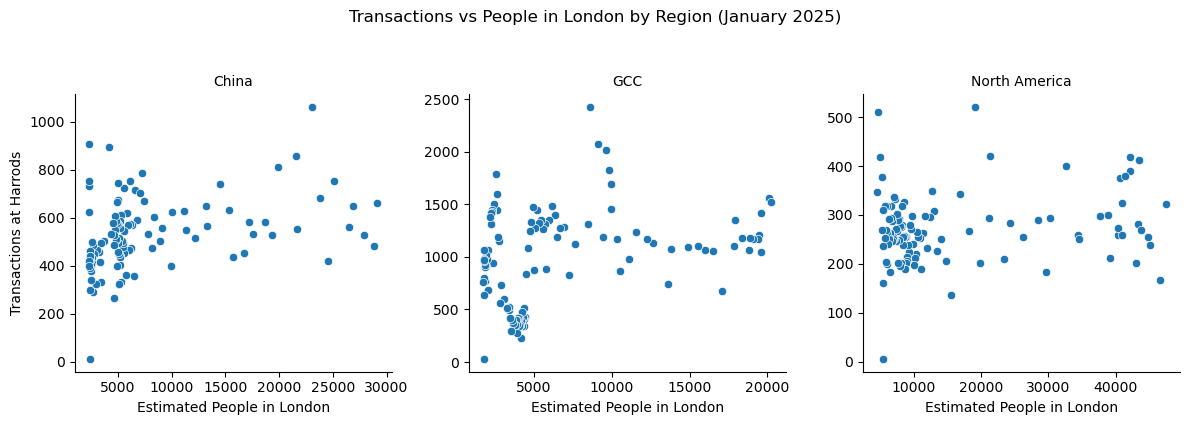

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

tx_data = grouped_transactions_raw

# --- Step 1: Prepare transaction data ---
tx_data['CAL_DAY'] = pd.to_datetime(tx_data['CAL_DAY'])

# Map transaction country groups to region
country_to_region = {
    'Greater China': 'China',
    'Middle East - GCC': 'GCC',
    'Europe': 'Europe',
    'APAC (ex China)': 'APAC (ex China)',
    'North America': 'North America',
    'Rest of World': 'Rest'
}
tx_data['region'] = tx_data['CALC_COUNTRY_GP'].map(country_to_region)
tx_data = tx_data[tx_data['region'].notna()]

# Group transactions by day and region
daily_tx = tx_data.groupby(['CAL_DAY', 'region'])['TRANX_TTL'].sum().reset_index()

# --- Step 2: Merge daily people presence with transactions ---

merged = pd.merge(daily_presence, daily_tx, on=['CAL_DAY', 'region'], how='inner')

# --- Step 3: Scatter plot (people_in_london vs transactions) ---

g = sns.FacetGrid(merged, col='region', col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='people_in_london', y='TRANX_TTL')

g.set_axis_labels("Estimated People in London", "Transactions at Harrods")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Transactions vs People in London by Region (January 2025)', y=1.05)
plt.tight_layout()
plt.show()


In [27]:
grouped_flight.LOS_AT_DESTINATION_NIGHTS.unique	

<bound method Series.unique of 0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
26472    318.0
26473    326.0
26474    331.0
26475    362.0
26476    363.0
Name: LOS_AT_DESTINATION_NIGHTS, Length: 26477, dtype: float64>